In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split, GridSearchCV
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-and-potability/water_potability.csv


In [2]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression ,LinearRegression
from sklearn.utils import resample


In [3]:
data=pd.read_csv("/kaggle/input/water-quality-and-potability/water_potability.csv")

In [4]:
data.dropna(inplace=True)

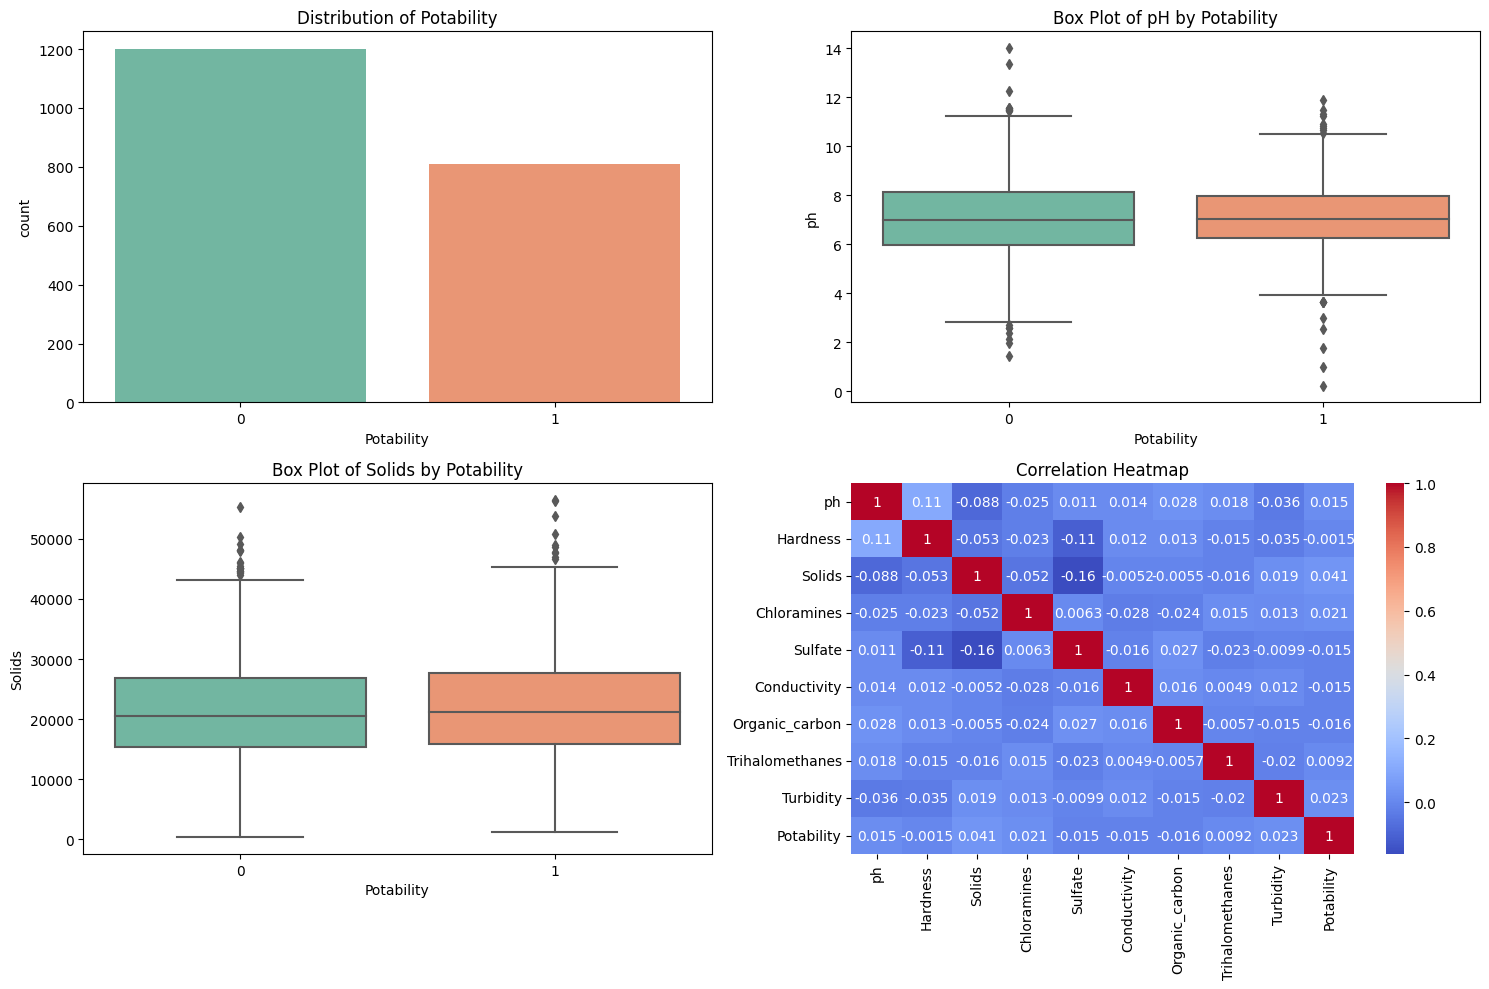

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.3)

# Plot 1: Histogram of Potability
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='Potability', palette='Set2')
plt.title('Distribution of Potability')

# Plot 2: Box Plot of pH by Potability
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='Potability', y='ph', palette='Set2')
plt.title('Box Plot of pH by Potability')

# Plot 3: Box Plot of Solids by Potability
plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='Potability', y='Solids', palette='Set2')
plt.title('Box Plot of Solids by Potability')

# Plot 4: Correlation Heatmap
plt.subplot(2, 2, 4)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Display the plots
plt.tight_layout()
plt.show()

In [6]:
len(data.columns)

10

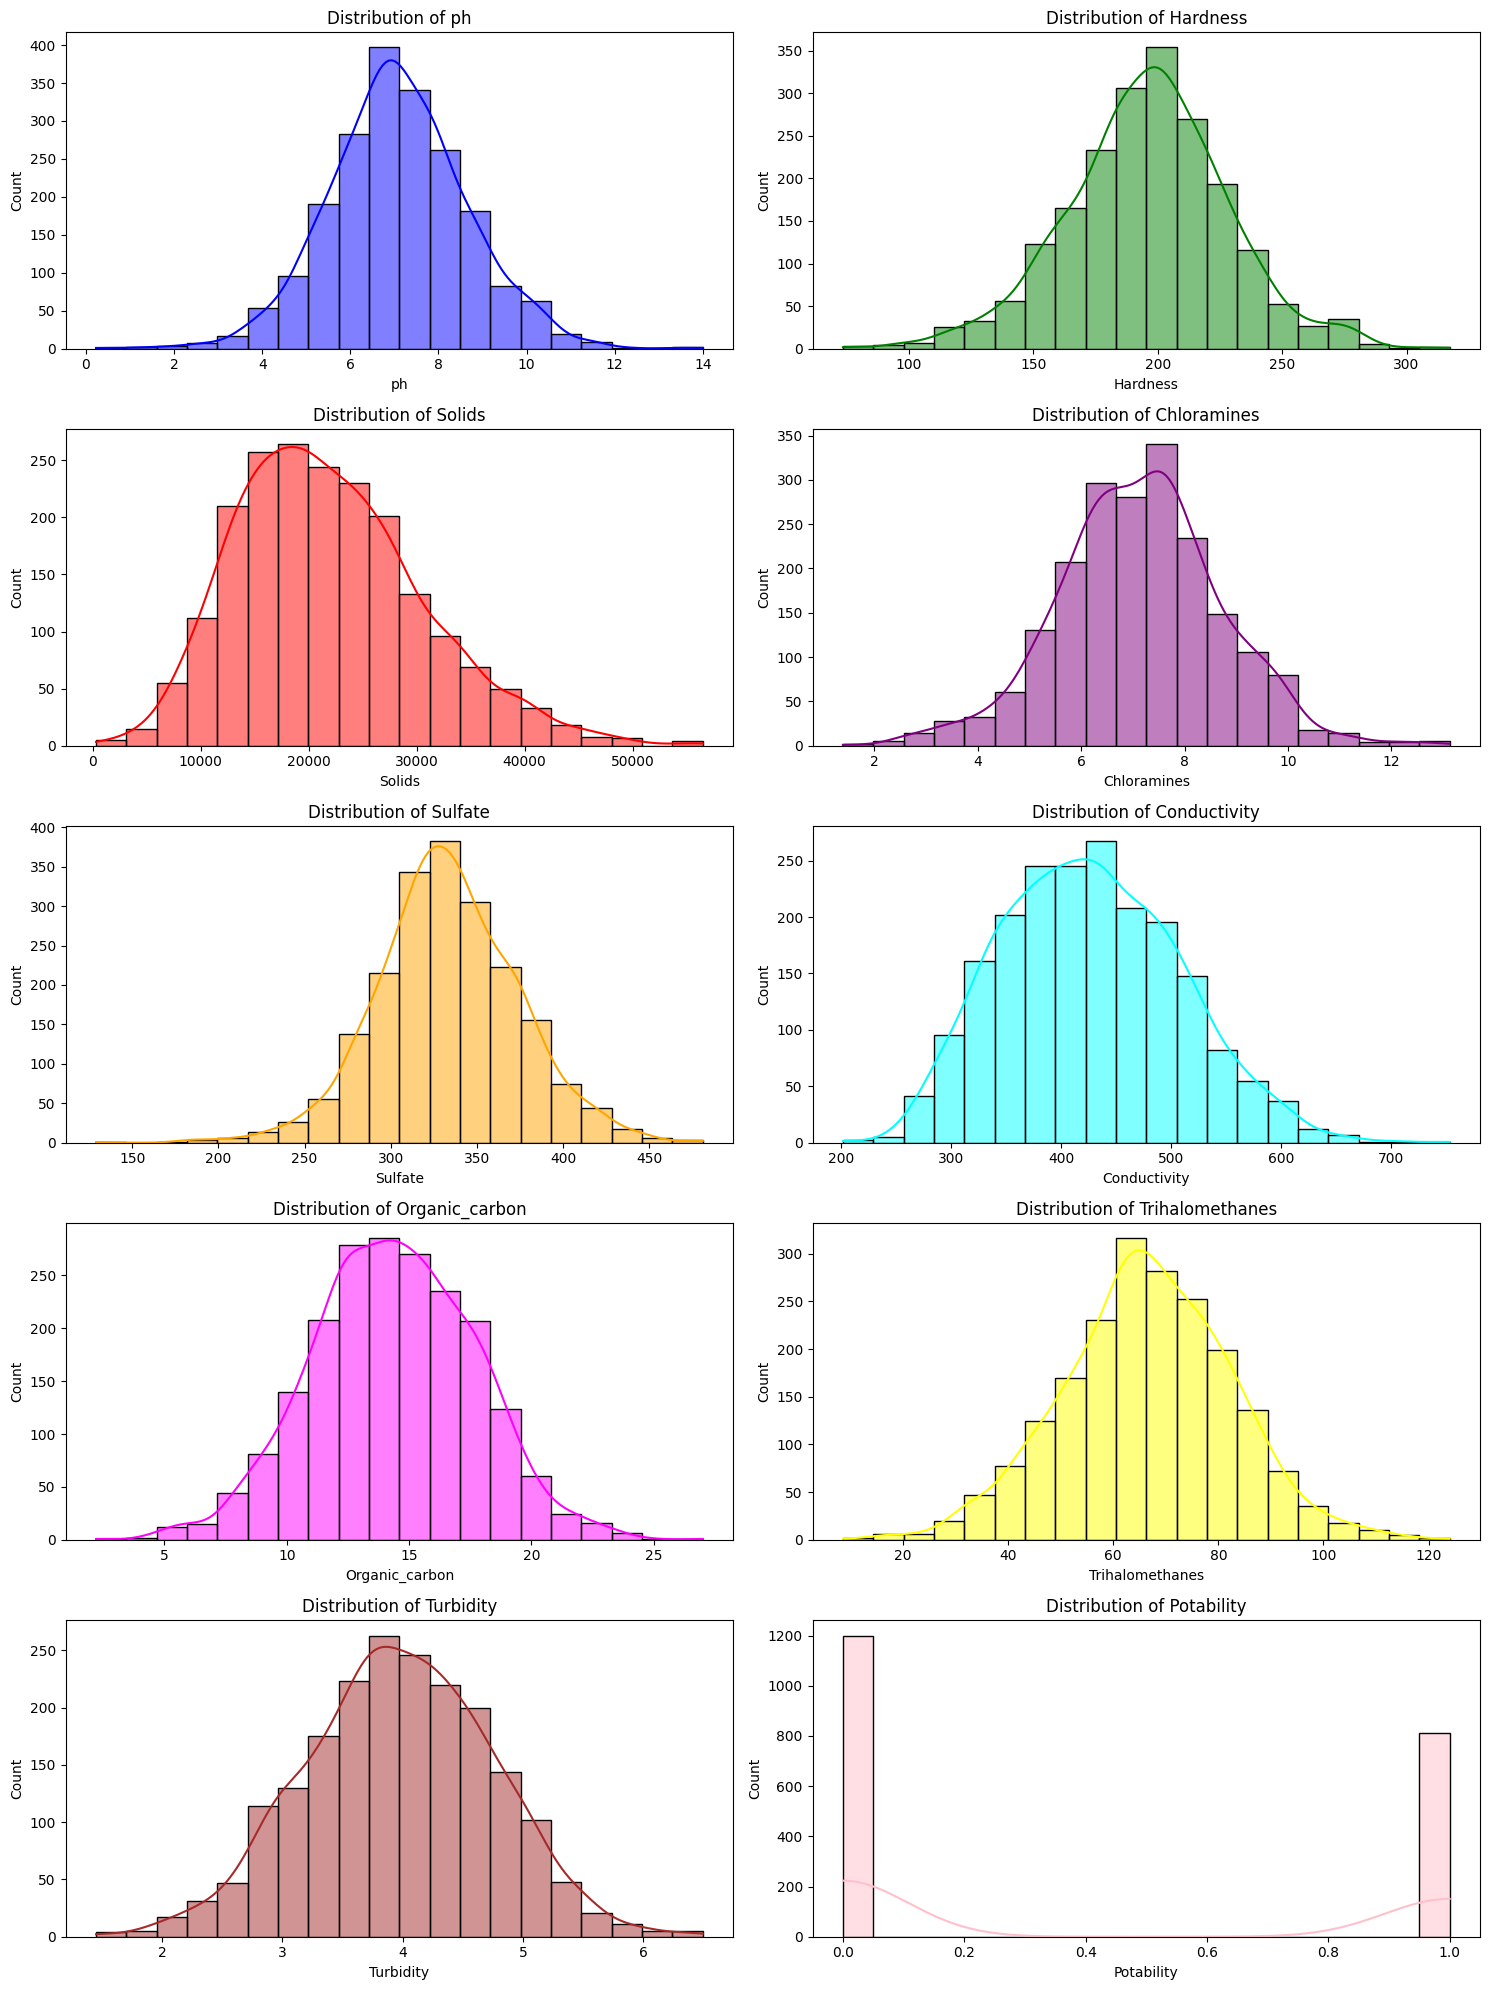

In [7]:
plt.figure(figsize=(15, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# List of colors for different columns
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Loop through each column in the dataset
o = 1
for i, col in enumerate(data.columns):
    plt.subplot(5, 2, o)
    sns.histplot(data=data, x=col, kde=True, color=colors[i % len(colors)], bins=20)
    plt.title(f'Distribution of {col}')
    o += 1

# Display the plots
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


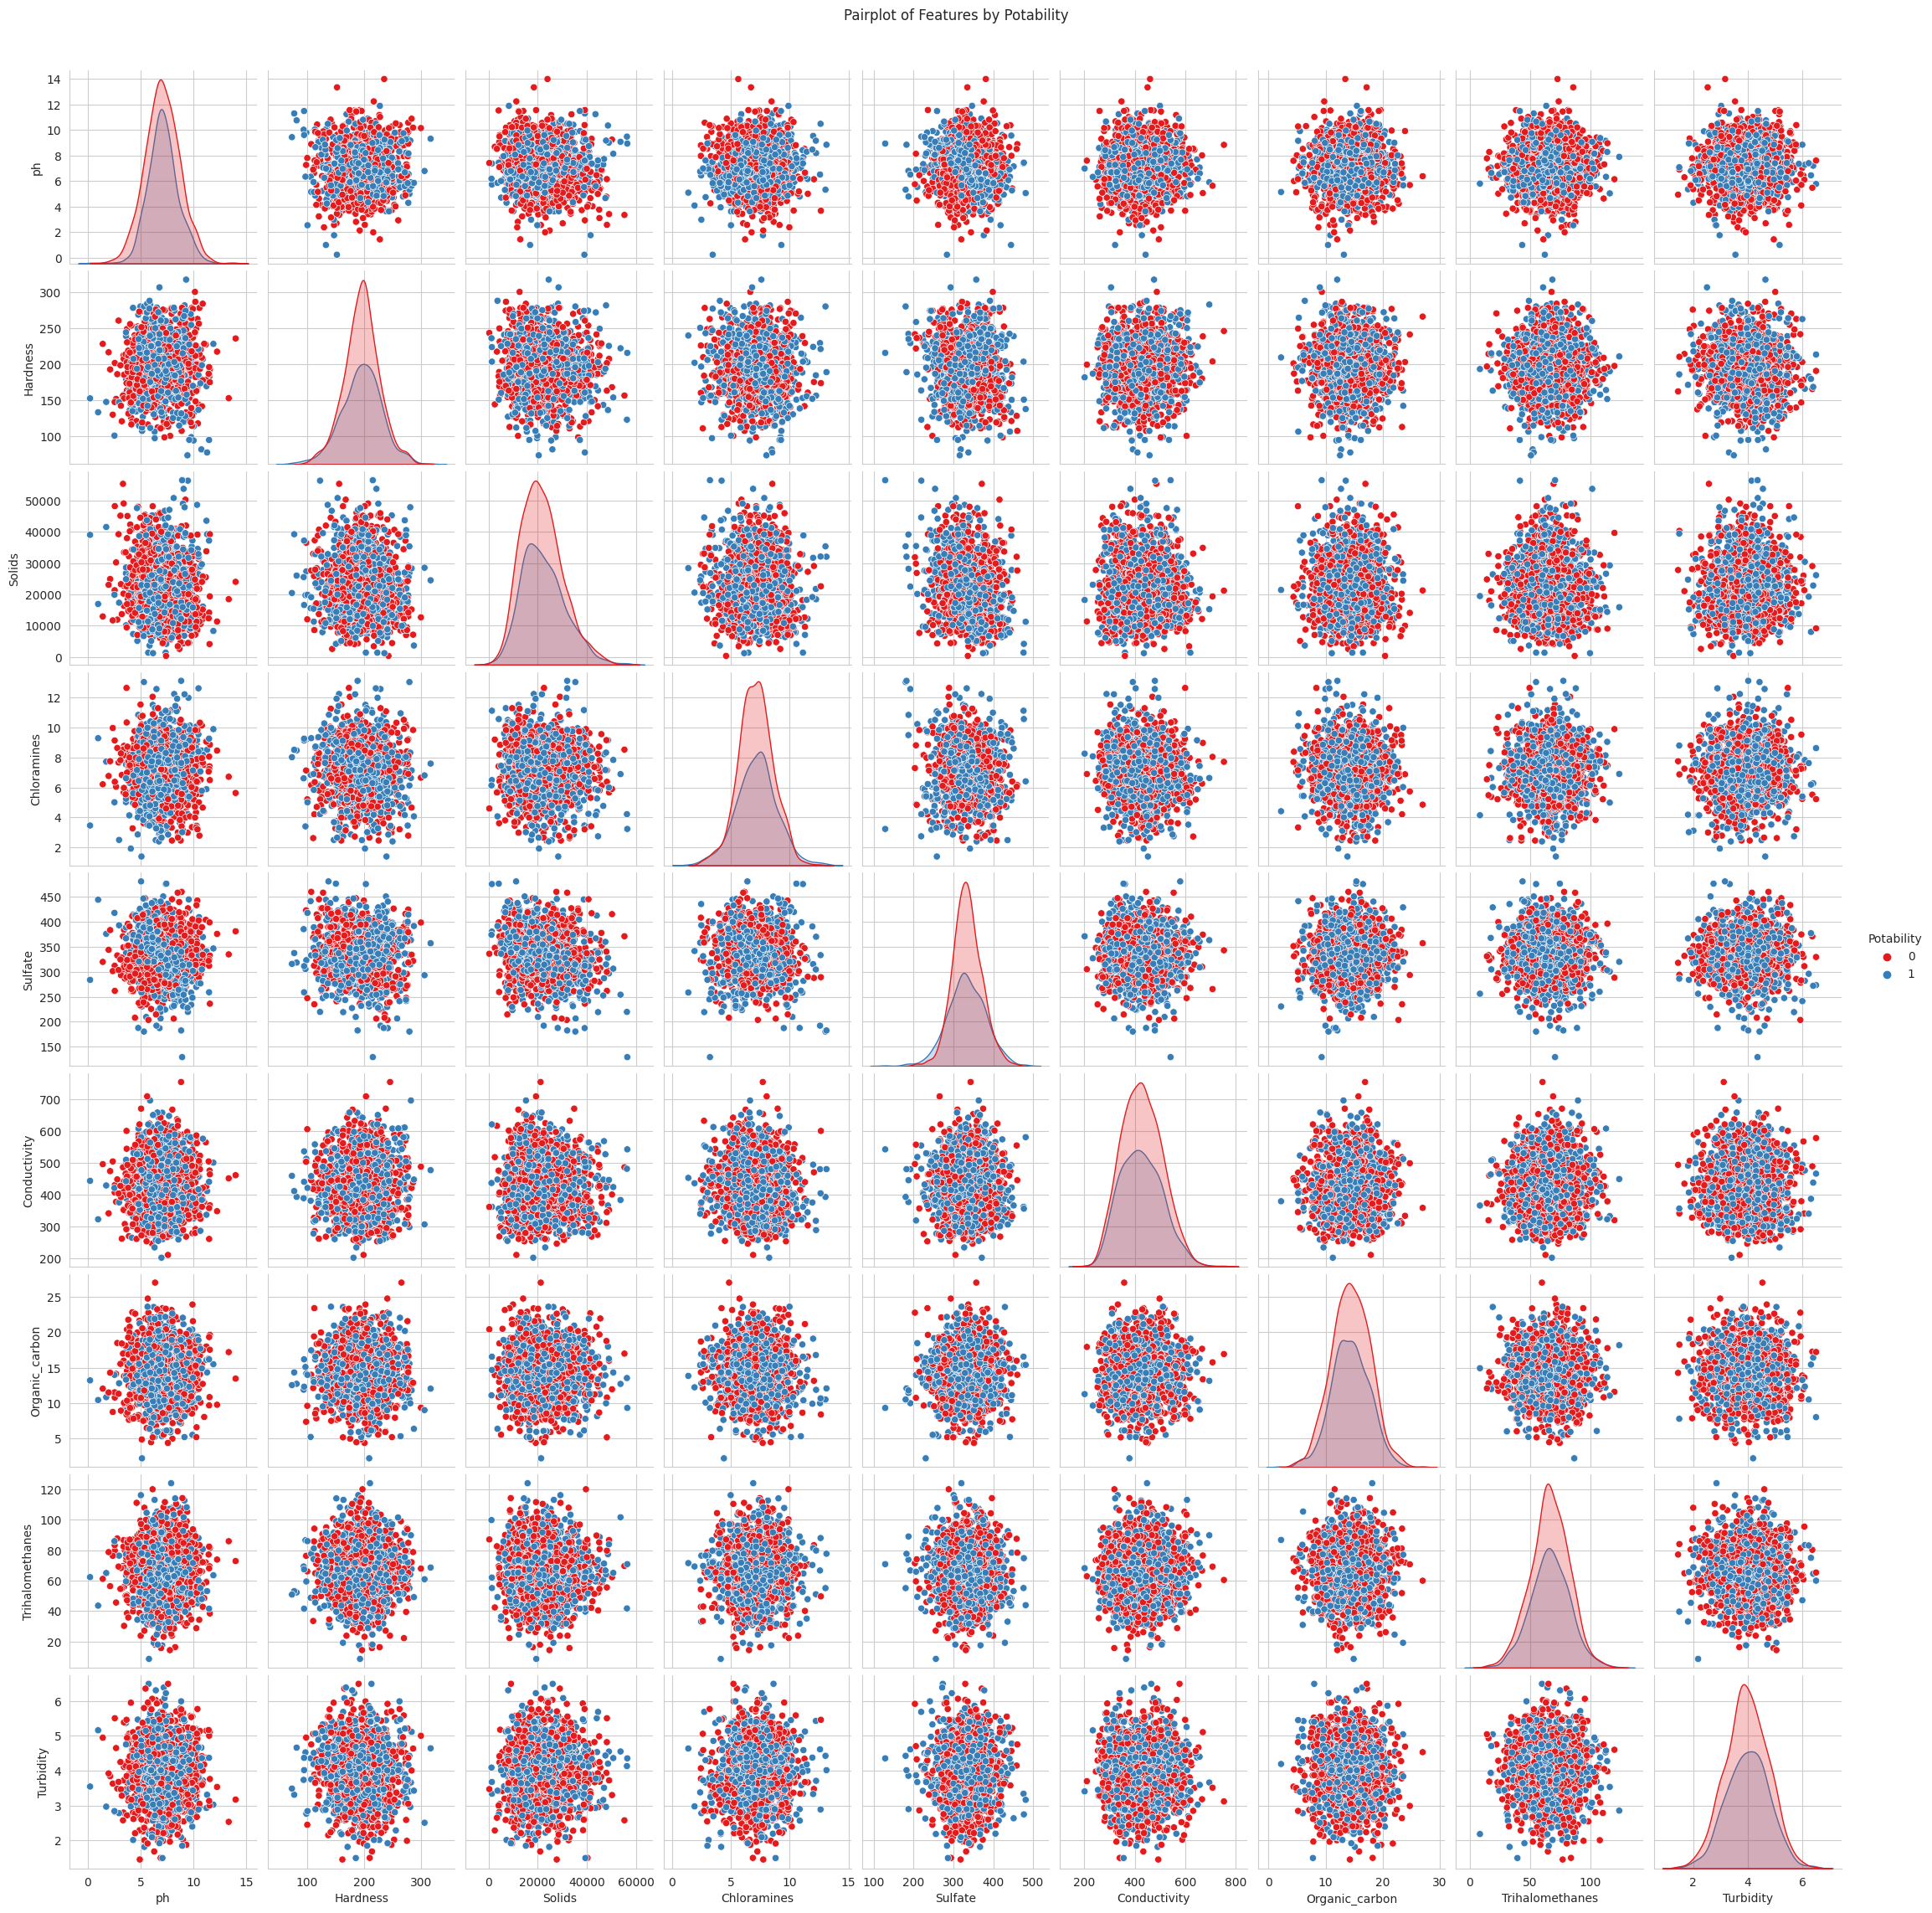

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset

# Set the Seaborn style
sns.set_style("whitegrid")

# Pairplot of Features by Potability
sns.pairplot(data=data, hue='Potability', palette='Set1')
plt.suptitle('Pairplot of Features by Potability', y=1.02)
plt.show()



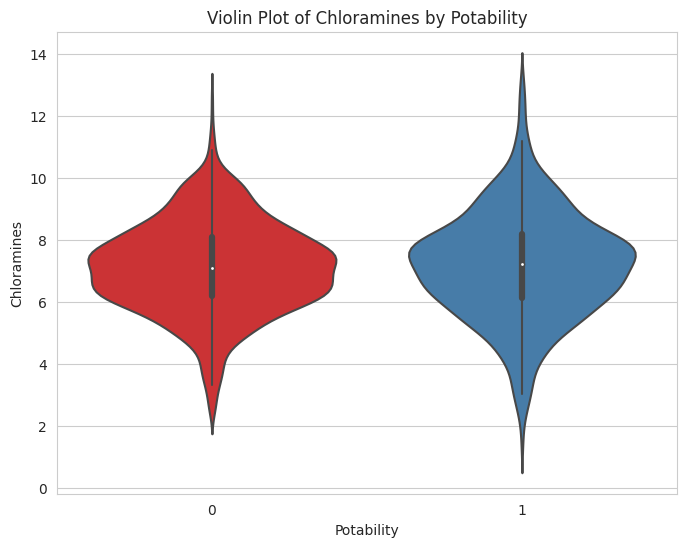

In [9]:

# Violin Plot of Chloramines by Potability
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Potability', y='Chloramines', palette='Set1')
plt.title('Violin Plot of Chloramines by Potability')
plt.show()

# Interactive Scatter Plot using Plotly


In [10]:
num=data.iloc[:,-1].value_counts()
d=resample(data[data.iloc[:,-1]==1] , replace=True,    # sample with replacement
                                 n_samples= num[0], # to match majority class
                                 random_state=42)  # reproducible results)
data=pd.concat([d,data[data.iloc[:,-1]==0]])

In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
scaler = MinMaxScaler()
Polynom = PolynomialFeatures(degree=3)
data3= Polynom.fit_transform(data.iloc[:,:-1])
data3= scaler.fit_transform(data3)
data2=pd.DataFrame(data3)
data2['-1']=0
data2.iloc[:,-1]=data.iloc[:,-1]


In [12]:
num=data2.iloc[:,-1].value_counts()


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15)

In [15]:
data2=data2.sample(len(data2))

In [16]:
train=0
test=0
for idx_train,idx_test in sss.split(data2.iloc[:,:-1],data2.iloc[:,-1]):
    train=data2.iloc[idx_train,:]
    test=data2.iloc[idx_test,:]

<Axes: >

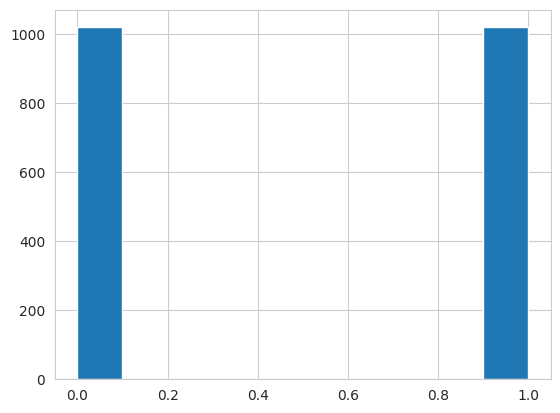

In [17]:
train.iloc[:,-1].hist()


In [18]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier

In [19]:
model_extra=ExtraTreesClassifier(random_state=42,n_estimators=300)

In [20]:
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [ 100,200,300],
    'max_depth': [None, 10, 20],
}

# Perform grid search with cross-validation

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3,    verbose=1, scoring='accuracy')
grid_search.fit(train.iloc[:,:-1], train.iloc[:,-1])
model_random=grid_search.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [21]:
rf_classifier = ExtraTreesClassifier()

param_grid = {
    'n_estimators': [ 100,200,300],
    'max_depth': [None, 10, 20],
}

# Perform grid search with cross-validation

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3,    verbose=1, scoring='accuracy')
grid_search.fit(train.iloc[:,:-1], train.iloc[:,-1])
model_extra=grid_search.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [22]:
model_ada=AdaBoostClassifier(random_state=42,n_estimators=200,learning_rate=1)

In [23]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.1, random_state=42)

In [24]:
model_log=LogisticRegression(random_state=42,max_iter=200)


In [25]:
for idx_train,idx_test in sss.split(train.iloc[:,:-1],train.iloc[:,-1]):
                model_log.fit(train.iloc[idx_train,:-1],train.iloc[idx_train,-1])
                print(model_log.score(train.iloc[idx_test,:-1],train.iloc[idx_test,-1]))
model_log.fit(train.iloc[:,:-1],train.iloc[:,-1])
print(model_log.score(test.iloc[:,:-1],test.iloc[:,-1]))            

0.6421568627450981
0.5931372549019608
0.6421568627450981
0.6176470588235294
0.6617647058823529
0.6333333333333333


In [26]:
from sklearn.svm import SVC

In [27]:

svm_classifier = SVC()

param_grid = {
    'C': [0.1, 1, 10,200],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] 
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(train.iloc[:,:-1],train.iloc[:,-1])
model_svc=grid_search.best_estimator_

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
mnb=KNeighborsClassifier(n_neighbors=4)
for idx_train,idx_test in sss.split(train.iloc[:,:-1],train.iloc[:,-1]):
                mnb.fit(train.iloc[idx_train,:-1],train.iloc[idx_train,-1])
                print(mnb.score(train.iloc[idx_test,:-1],train.iloc[idx_test,-1]))
mnb.fit(train.iloc[:,:-1],train.iloc[:,-1])
print(mnb.score(test.iloc[:,:-1],test.iloc[:,-1]))            

0.6911764705882353
0.6225490196078431
0.6323529411764706
0.6862745098039216
0.6715686274509803
0.6944444444444444


In [30]:
for idx_train,idx_test in sss.split(train.iloc[:,:-1],train.iloc[:,-1]):
                model_svc.fit(train.iloc[idx_train,:-1],train.iloc[idx_train,-1])
                print(model_svc.score(train.iloc[idx_test,:-1],train.iloc[idx_test,-1]))
model_svc.fit(train.iloc[:,:-1],train.iloc[:,-1])
print(model_svc.score(test.iloc[:,:-1],test.iloc[:,-1]))            

0.75
0.6911764705882353
0.75
0.7401960784313726
0.75
0.7916666666666666


In [31]:
from xgboost import XGBClassifier

In [32]:
model_xgb=XGBClassifier(random_state=42,n_estimators=300)
for idx_train,idx_test in sss.split(train.iloc[:,:-1],train.iloc[:,-1]):
                model_xgb.fit(train.iloc[idx_train,:-1],train.iloc[idx_train,-1])
                print(model_xgb.score(train.iloc[idx_test,:-1],train.iloc[idx_test,-1]))
model_xgb.fit(train.iloc[:,:-1],train.iloc[:,-1])
print(model_xgb.score(test.iloc[:,:-1],test.iloc[:,-1]))            

0.8235294117647058
0.7598039215686274
0.8431372549019608
0.8235294117647058
0.8333333333333334
0.8444444444444444


In [33]:
for idx_train,idx_test in sss.split(train.iloc[:,:-1],train.iloc[:,-1]):
                model_extra.fit(train.iloc[idx_train,:-1],train.iloc[idx_train,-1])
                print(model_extra.score(train.iloc[idx_test,:-1],train.iloc[idx_test,-1]))
model_extra.fit(train.iloc[:,:-1],train.iloc[:,-1])
print(model_extra.score(test.iloc[:,:-1],test.iloc[:,-1]))            

0.8529411764705882
0.8284313725490197
0.8823529411764706
0.8627450980392157
0.8627450980392157
0.875


In [34]:
for idx_train,idx_test in sss.split(train.iloc[:,:-1],train.iloc[:,-1]):
                model_random.fit(train.iloc[idx_train,:-1],train.iloc[idx_train,-1])
                print(model_random.score(train.iloc[idx_test,:-1],train.iloc[idx_test,-1]))
model_random.fit(train.iloc[:,:-1],train.iloc[:,-1])
print(model_random.score(test.iloc[:,:-1],test.iloc[:,-1]))            

0.8235294117647058
0.8088235294117647
0.8529411764705882
0.7990196078431373
0.8627450980392157
0.8583333333333333


In [35]:
for idx_train,idx_test in sss.split(train.iloc[:,:-1],train.iloc[:,-1]):
                model_ada.fit(train.iloc[idx_train,:-1],train.iloc[idx_train,-1])
                print(model_ada.score(train.iloc[idx_test,:-1],train.iloc[idx_test,-1]))
model_ada.fit(train.iloc[:,:-1],train.iloc[:,-1])
print(model_ada.score(test.iloc[:,:-1],test.iloc[:,-1]))            

0.7254901960784313
0.7156862745098039
0.7598039215686274
0.7352941176470589
0.7352941176470589
0.7305555555555555


In [36]:
model_random=model_extra

In [37]:
y_test=model_random.predict(test.iloc[:,:-1])
y_train=model_random.predict(train.iloc[:,:-1])

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_test = accuracy_score(y_test, test.iloc[:,-1])
accuracy_train = accuracy_score(y_train,train.iloc[:,-1])

confusion = confusion_matrix(y_test, test.iloc[:,-1])
classification_rep = classification_report(y_test, test.iloc[:,-1])


print(f"Accuracy on train: {accuracy_train:.2f}")
print(f"Accuracy on test: {accuracy_test:.2f}")
print("-------------------------------------------------")
print("Confusion Matrix:\n", confusion)
print("-------------------------------------------------")
print("Classification Report:\n", classification_rep)

Accuracy on train: 1.00
Accuracy on test: 0.88
-------------------------------------------------
Confusion Matrix:
 [[167  32]
 [ 13 148]]
-------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       199
           1       0.82      0.92      0.87       161

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.87       360
weighted avg       0.88      0.88      0.88       360



In [39]:
from sklearn.model_selection import GridSearchCV


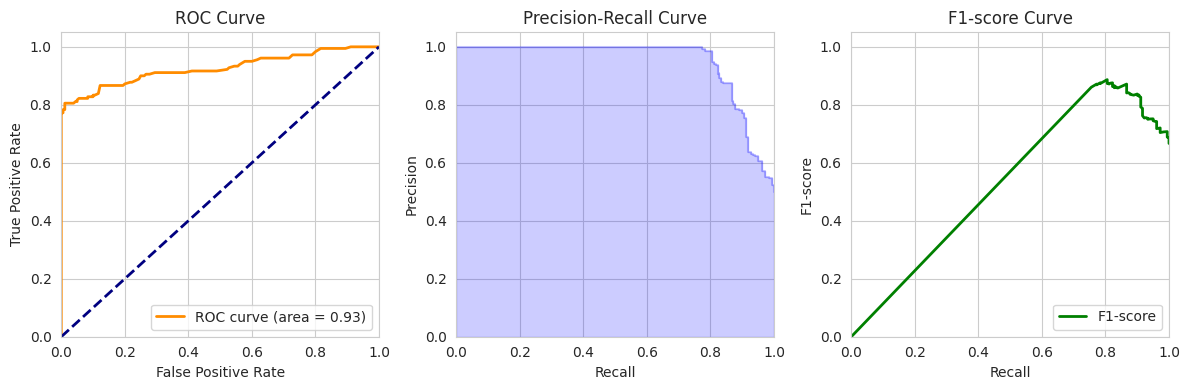

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score

# Assuming you have a trained binary classification model
# and you have test feature data (X_test) and true labels (y_test)
# Replace these placeholders with your actual data

# Get predicted probabilities
predicted_probabilities = model_random.predict_proba(test.iloc[:,:-1])[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(test.iloc[:,-1], predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(test.iloc[:,-1], predicted_probabilities)

# Calculate F1-score
f1_scores = [2 * (p * r) / (p + r) for p, r in zip(precision, recall)]

# Plot ROC curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 3, 2)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')

# Plot F1-score curve
plt.subplot(1, 3, 3)
plt.plot(recall, f1_scores, color='g', lw=2, label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('F1-score Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()